In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Admission_Predict.csv')
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [3]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x)
print(y)

[[  1.   337.   118.   ...   4.5    9.65   1.  ]
 [  2.   324.   107.   ...   4.5    8.87   1.  ]
 [  3.   316.   104.   ...   3.5    8.     1.  ]
 ...
 [498.   330.   120.   ...   5.     9.56   1.  ]
 [499.   312.   103.   ...   5.     8.43   0.  ]
 [500.   327.   113.   ...   4.5    9.04   0.  ]]
[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 

In [6]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_tr)
print(x_te)
print(y_tr)
print(y_te)

[[108.   338.   117.   ...   4.5    9.46   1.  ]
 [337.   319.   110.   ...   2.5    8.79   0.  ]
 [ 72.   336.   112.   ...   5.     9.76   1.  ]
 ...
 [118.   290.   104.   ...   2.5    7.46   0.  ]
 [ 48.   339.   119.   ...   4.     9.7    0.  ]
 [173.   322.   110.   ...   5.     9.13   1.  ]]
[[ 91.   318.   106.     2.     4.     4.     7.92   1.  ]
 [255.   321.   114.     4.     4.     5.     9.12   0.  ]
 [284.   321.   111.     3.     2.5    3.     8.9    1.  ]
 [446.   328.   116.     5.     4.5    5.     9.08   1.  ]
 [462.   301.   102.     3.     2.5    2.     8.13   1.  ]
 [ 16.   314.   105.     3.     3.5    2.5    8.3    0.  ]
 [317.   298.   101.     2.     1.5    2.     7.86   0.  ]
 [490.   302.   110.     3.     4.     4.5    8.5    0.  ]
 [160.   297.   100.     1.     1.5    2.     7.9    0.  ]
 [154.   324.   105.     3.     3.     4.     8.75   0.  ]
 [242.   317.   103.     2.     2.5    2.     8.15   0.  ]
 [251.   320.   104.     3.     3.     2.5    8.57 

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_tr,y_tr)
print(lr)

LinearRegression()


In [8]:
y_pred=lr.predict(x_te)
print(y_pred)

[0.64855223 0.83631124 0.78022191 0.89888581 0.61863599 0.62593763
 0.53470978 0.71990985 0.51560535 0.73519895 0.61055564 0.70712359
 0.63147094 0.76035135 0.87887677 0.51485539 0.8413721  0.65272855
 0.7561483  0.51485927 0.51032751 0.72949117 0.52082157 0.9117646
 0.81763852 0.74307177 0.68430741 0.51327231 0.56840962 0.59142766
 0.7355418  0.4738788  0.64141599 0.83346771 0.5753016  0.61238562
 0.84891241 0.88655504 0.60147024 0.65451322 0.67497534 0.8829718
 0.88244992 0.72151821 0.75944796 0.78279173 0.97116556 0.85996403
 0.65911239 0.64654876 0.64051823 0.62546904 0.61981749 0.79288132
 0.68287048 0.83477907 0.53302884 0.85644175 0.60186026 0.64571362
 0.48207629 0.9108896  0.62924802 0.95676576 0.72404326 0.61406759
 0.71339572 0.86527513 0.51617515 0.76212218 0.8871168  0.76962788
 0.70510681 0.66168246 0.78638974 0.92601386 0.75556474 0.71595921
 0.57757933 0.66373982 0.6013281  0.85859588 0.57578881 0.66800638
 0.77969987 0.5588874  0.83040975 0.60998843 0.46699807 0.645060

In [9]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=r2_score(y_te,y_pred)
mae=mean_absolute_error(y_te,y_pred)
mse=mean_squared_error(y_te,y_pred)
rmse=np.sqrt(mse)
print("RMSE",rmse)
print("MAE",mae)
print("MSE",mse)
print("Rscore",r2)

RMSE 0.06263959056109288
MAE 0.04801298675321843
MSE 0.003923718305661356
Rscore 0.7753349858623023


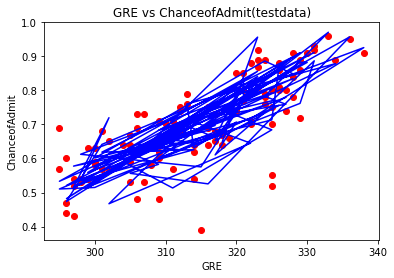

In [12]:
plt.scatter(x_te[:,1],y_te,color='red')
plt.plot(x_te[:,1],y_pred,color='blue')
plt.title('GRE vs ChanceofAdmit(testdata)')
plt.xlabel('GRE')
plt.ylabel('ChanceofAdmit')
plt.show()

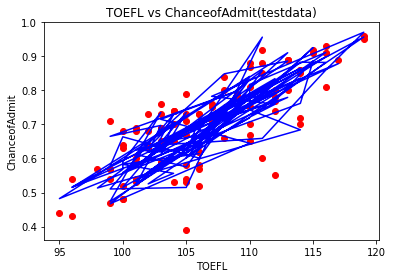

In [13]:
plt.scatter(x_te[:,2],y_te,color='red')
plt.plot(x_te[:,2],y_pred,color='blue')
plt.title('TOEFL vs ChanceofAdmit(testdata)')
plt.xlabel('TOEFL')
plt.ylabel('ChanceofAdmit')
plt.show()

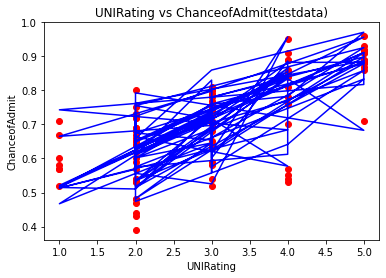

In [14]:
plt.scatter(x_te[:,3],y_te,color='red')
plt.plot(x_te[:,3],y_pred,color='blue')
plt.title('UNIRating vs ChanceofAdmit(testdata)')
plt.xlabel('UNIRating')
plt.ylabel('ChanceofAdmit')
plt.show()

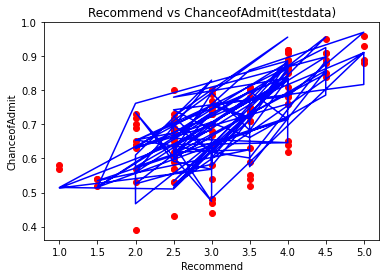

In [15]:
plt.scatter(x_te[:,4],y_te,color='red')
plt.plot(x_te[:,4],y_pred,color='blue')
plt.title('Recommend vs ChanceofAdmit(testdata)')
plt.xlabel('Recommend')
plt.ylabel('ChanceofAdmit')
plt.show()

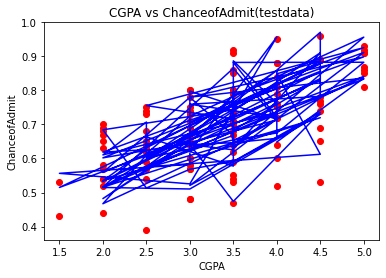

In [16]:
plt.scatter(x_te[:,5],y_te,color='red')
plt.plot(x_te[:,5],y_pred,color='blue')
plt.title('CGPA vs ChanceofAdmit(testdata)')
plt.xlabel('CGPA')
plt.ylabel('ChanceofAdmit')
plt.show()

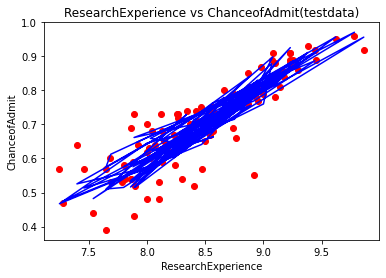

In [17]:
plt.scatter(x_te[:,6],y_te,color='red')
plt.plot(x_te[:,6],y_pred,color='blue')
plt.title('ResearchExperience vs ChanceofAdmit(testdata)')
plt.xlabel('ResearchExperience')
plt.ylabel('ChanceofAdmit')
plt.show()